<a href="https://colab.research.google.com/github/AShipulin/usurt/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_8_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регресссия

## Ипортируем библиотеки

In [ ]:
import numpy as np  # линейная алгебра
import pandas as pd # обрабтка данных
import matplotlib.pyplot as plt # Графики
import seaborn as sns # Графики

# Машинное обучение
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

## Загрузка данных

In [ ]:
# Загрузка нескольких файлов
s1 = pd.read_excel('/content/УАТ. colab v.2_24.xlsx')
s2 = pd.read_excel('/content/УАТ. colab v.2_23.xlsx')
s3 = pd.read_excel('/content/УАТ. colab v.2_22.xlsx')
s4 = pd.read_excel('/content/УАТ. colab v.2_21.xlsx')
df = pd.concat([s1, s2, s3, s4])

# Просомтрим что загрузили
df.head()

,mm,d,hh24,km,km_empty,cargo_t,cust,car,car_model,car_mark,driver,type,depo_get_in,depo_get_out,mi
0,1,1,11,790,390.0,0.0,7998.0,218,1717,1721.0,91,Погрузка 20',NaN,П0000112,1970
1,1,1,12,1318,668.0,0.0,7998.0,227,1696,1697.0,476,Погрузка 40',П0000216,П0000224,3327
2,1,1,12,509,259.0,0.0,8216.0,233,1726,1697.0,102,Вывоз 40',П0000213,NaN,1811
3,1,1,12,547,277.0,10.0,1698.0,227,1696,1697.0,476,Вывоз 40',П0000213,NaN,1382
4,1,1,12,588,308.0,10.0,8176.0,246,1724,1697.0,546,Вывоз 40',П0000045,NaN,2015


In [ ]:
# Информация
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14312 entries, 0 to 4559
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mm            14312 non-null  int64  
 1   d             14312 non-null  int64  
 2   hh24          14312 non-null  int64  
 3   km            14312 non-null  int64  
 4   km_empty      14305 non-null  float64
 5   cargo_t       14300 non-null  float64
 6   cust          14300 non-null  float64
 7   car           14312 non-null  int64  
 8   car_model     14312 non-null  int64  
 9   car_mark      14285 non-null  float64
 10  driver        14312 non-null  int64  
 11  type          14300 non-null  object 
 12  depo_get_in   11615 non-null  object 
 13  depo_get_out  8887 non-null   object 
 14  mi            14312 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 1.7+ MB


## Преобразуем даных

## Заполним пропуски в depo

In [ ]:
# Замена пропущенных значений в столбце "depo_get_in" на наиболее часто встречающееся значение
depo_get_out = df['depo_get_in'].mode()[0]  # Вычисление моды (наиболее часто встречающегося значения)
df['depo_get_in'].fillna(depo_get_out, inplace=True)

In [ ]:
# Замена пропущенных значений в столбце "depo_get_out" на наиболее часто встречающееся значение
depo_get_out = df['depo_get_out'].mode()[0]  # Вычисление моды (наиболее часто встречающегося значения)
df['depo_get_out'].fillna(depo_get_out, inplace=True)

In [ ]:
# Инф. о даных
df.describe()

,mm,d,hh24,km,km_empty,cargo_t,cust,car,car_model,car_mark,driver,mi
count,14312.000000,14312.000000,14312.000000,14312.000000,14305.000000,14300.000000,14300.000000,14312.000000,14312.000000,14285.000000,14312.000000,14312.000000
mean,6.241965,3.839366,8.613262,432.135900,214.094163,13.642660,5827.072587,232.102711,1710.801775,1483.638432,236.247345,1170.786193
std,3.477440,1.682002,2.756719,513.773009,256.683142,481.217655,3206.944293,63.750497,60.011869,442.800936,210.186225,1145.742524
min,1.000000,1.000000,0.000000,0.000000,-1800.000000,0.000000,3.000000,0.000000,869.000000,123.000000,0.000000,0.000000
25%,3.000000,2.000000,7.000000,94.000000,50.000000,0.000000,1817.000000,219.000000,1710.000000,1697.000000,69.000000,510.000000
50%,6.000000,4.000000,8.000000,205.500000,112.000000,0.000000,8007.000000,226.000000,1718.000000,1697.000000,102.000000,690.000000
75%,9.000000,5.000000,9.000000,604.000000,306.000000,0.000000,8163.000000,233.000000,1726.000000,1697.000000,469.000000,1660.000000
max,12.000000,7.000000,23.000000,7437.000000,3737.000000,28166.000000,8466.000000,942.000000,1747.000000,1721.000000,733.000000,12780.000000


### Удалим пустые

In [ ]:
# Удалим пустые
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14266 entries, 0 to 4559
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mm            14266 non-null  int64  
 1   d             14266 non-null  int64  
 2   hh24          14266 non-null  int64  
 3   km            14266 non-null  int64  
 4   km_empty      14266 non-null  float64
 5   cargo_t       14266 non-null  float64
 6   cust          14266 non-null  float64
 7   car           14266 non-null  int64  
 8   car_model     14266 non-null  int64  
 9   car_mark      14266 non-null  float64
 10  driver        14266 non-null  int64  
 11  type          14266 non-null  object 
 12  depo_get_in   14266 non-null  object 
 13  depo_get_out  14266 non-null  object 
 14  mi            14266 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 1.7+ MB


### Конвертируем коды справочников в int

Ковертируем через справочник

In [ ]:
# cust

# Преобразуем в int
df['cust'] = df['cust'].astype(int)

# Создаем справочник в цикле по уникальным значениям
# где i - индекс, v - значение
cust = {v:i for i, v in enumerate(df["cust"].unique())}

# Заменяем значения
df['cust'] = df['cust'].replace(cust)

<ipython-input-95-c6bff9f4ebd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cust'] = df['cust'].astype(int)
<ipython-input-95-c6bff9f4ebd2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cust'] = df['cust'].replace(cust)


In [ ]:
# car_model

# Преобразуем в int
df['car_model'] = df['car_model'].astype(int)

# Создаем справочник в цикле по уникальным значениям
# где i - индекс, v - значение
car_model = {v:i for i, v in enumerate(df["car_model"].unique())}

# Заменяем значения
df['car_model'] = df['car_model'].replace(car_model)

<ipython-input-96-291174c0c2ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_model'] = df['car_model'].astype(int)
<ipython-input-96-291174c0c2ed>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_model'] = df['car_model'].replace(car_model)


In [ ]:
# car_mark

# Преобразуем в int
df['car_mark'] = df['car_mark'].astype(int)

# Создаем справочник в цикле по уникальным значениям
# где i - индекс, v - значение
car_mark = {v:i for i, v in enumerate(df["car_mark"].unique())}

# Заменяем значения
df['car_mark'] = df['car_mark'].replace(car_mark)

<ipython-input-97-659ebf828337>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_mark'] = df['car_mark'].astype(int)
<ipython-input-97-659ebf828337>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_mark'] = df['car_mark'].replace(car_mark)


In [ ]:
# depo_get_in

# Преобразуем в int
#df['depo_get_in'] = df['depo_get_in'].astype(int)

# Создаем справочник в цикле по уникальным значениям
# где i - индекс, v - значение
depo_get_in = {v:i for i, v in enumerate(df["depo_get_in"].unique())}

# Заменяем значения
df['depo_get_in'] = df['depo_get_in'].replace(depo_get_in)

In [ ]:
# depo_get_out

# Преобразуем в int
#df['depo_get_out'] = df['depo_get_out'].astype(int)

# Создаем справочник в цикле по уникальным значениям
# где i - индекс, v - значение
depo_get_out = {v:i for i, v in enumerate(df["depo_get_out"].unique())}

# Заменяем значения
df['depo_get_out'] = df['depo_get_out'].replace(depo_get_out)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14266 entries, 0 to 4559
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mm            14266 non-null  int64  
 1   d             14266 non-null  int64  
 2   hh24          14266 non-null  int64  
 3   km            14266 non-null  int64  
 4   km_empty      14266 non-null  float64
 5   cargo_t       14266 non-null  float64
 6   cust          14266 non-null  int64  
 7   car           14266 non-null  int64  
 8   car_model     14266 non-null  int64  
 9   car_mark      14266 non-null  int64  
 10  driver        14266 non-null  int64  
 11  type          14266 non-null  object 
 12  depo_get_in   14266 non-null  int64  
 13  depo_get_out  14266 non-null  int64  
 14  mi            14266 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.7+ MB


### Разворачиваем столбец type

In [ ]:
# Разделим type
df[["type_oper", "type_cont"]] = df["type"].str.split(" ", expand=True, n=1)

In [ ]:
# Удаляем type
try:
    df = df.drop('type', axis=1)
except KeyError:
    print("Field does not exist")

In [ ]:
# Посмотрим что в type_oper
df.groupby(['type_oper']).count()

,mm,d,hh24,km,km_empty,cargo_t,cust,car,car_model,car_mark,driver,depo_get_in,depo_get_out,mi,type_cont
type_oper,,,,,,,,,,,,,,,
Вывоз,8486,8486,8486,8486,8486,8486,8486,8486,8486,8486,8486,8486,8486,8486,8486
ДОЗАГРУЗ,83,83,83,83,83,83,83,83,83,83,83,83,83,83,0
Дополнительные,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Кузов,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
Погрузка,4623,4623,4623,4623,4623,4623,4623,4623,4623,4623,4623,4623,4623,4623,4623
Порож.,885,885,885,885,885,885,885,885,885,885,885,885,885,885,885
Самосвал,26,26,26,26,26,26,26,26,26,26,26,26,26,26,0
Тент,71,71,71,71,71,71,71,71,71,71,71,71,71,71,0
Трал,61,61,61,61,61,61,61,61,61,61,61,61,61,61,0


In [ ]:
# Преобразуем значения строк в столбцы
df['type_oper_unload'] = df.type_oper.apply(lambda x: 0 if x == 'Вывоз' else 1)
df['type_oper_load'] = df.type_oper.apply(lambda x: 0 if x == 'Погрузка' else 1)
df['type_oper_empty'] = df.type_oper.apply(lambda x: 0 if x == 'Порож.' else 1)

In [ ]:
# Удаляем type_oper
try:
    df = df.drop('type_oper', axis=1)
except KeyError:
    print("Field does not exist")

In [ ]:
# Удаляем лишние строки
df = df.drop(df[(df.type_oper_unload == 0) & (df.type_oper_load == 0) & (df.type_oper_empty == 0)].index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14266 entries, 0 to 4559
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mm                14266 non-null  int64  
 1   d                 14266 non-null  int64  
 2   hh24              14266 non-null  int64  
 3   km                14266 non-null  int64  
 4   km_empty          14266 non-null  float64
 5   cargo_t           14266 non-null  float64
 6   cust              14266 non-null  int64  
 7   car               14266 non-null  int64  
 8   car_model         14266 non-null  int64  
 9   car_mark          14266 non-null  int64  
 10  driver            14266 non-null  int64  
 11  depo_get_in       14266 non-null  int64  
 12  depo_get_out      14266 non-null  int64  
 13  mi                14266 non-null  int64  
 14  type_cont         14025 non-null  object 
 15  type_oper_unload  14266 non-null  int64  
 16  type_oper_load    14266 non-null  int64  
 17 

### Разворачиваем столбец type_cont

In [ ]:
# Посмотрим что в type_cont
df.groupby(['type_cont']).count()

,mm,d,hh24,km,km_empty,cargo_t,cust,car,car_model,car_mark,driver,depo_get_in,depo_get_out,mi,type_oper_unload,type_oper_load,type_oper_empty
type_cont,,,,,,,,,,,,,,,,,
(40' обрезанная),24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
20',7242,7242,7242,7242,7242,7242,7242,7242,7242,7242,7242,7242,7242,7242,7242,7242,7242
40',6752,6752,6752,6752,6752,6752,6752,6752,6752,6752,6752,6752,6752,6752,6752,6752,6752
услуги,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [ ]:
# Преобразуем значения строк в столбцы
df['type_cont_20'] = df.type_cont.apply(lambda x: 0 if x == "20'" else 1)
df['type_cont_40'] = df.type_cont.apply(lambda x: 0 if x == "40'" else 1)

In [ ]:
# Создаем справочник в цикле по уникальным значениям
# где i - индекс, v - значение
type_cont = {v:i for i, v in enumerate(df["type_cont"].unique())}

# Заменяем значения
df['type_cont'] = df['type_cont'].replace(type_cont)

In [ ]:
# Удаляем type_cont
try:
    df = df.drop('type_cont', axis=1)
except KeyError:
    print("Field does not exist")

In [ ]:
# Удаляем лишние строки
df = df.drop(df[(df.type_cont_20 == 0) & (df.type_cont_40 == 0)].index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14266 entries, 0 to 4559
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mm                14266 non-null  int64  
 1   d                 14266 non-null  int64  
 2   hh24              14266 non-null  int64  
 3   km                14266 non-null  int64  
 4   km_empty          14266 non-null  float64
 5   cargo_t           14266 non-null  float64
 6   cust              14266 non-null  int64  
 7   car               14266 non-null  int64  
 8   car_model         14266 non-null  int64  
 9   car_mark          14266 non-null  int64  
 10  driver            14266 non-null  int64  
 11  depo_get_in       14266 non-null  int64  
 12  depo_get_out      14266 non-null  int64  
 13  mi                14266 non-null  int64  
 14  type_oper_unload  14266 non-null  int64  
 15  type_oper_load    14266 non-null  int64  
 16  type_oper_empty   14266 non-null  int64  
 17 

### Проверим подготовленные даные

In [ ]:
# Инф. о даных
df.describe(include="all")

,mm,d,hh24,km,km_empty,cargo_t,cust,car,car_model,car_mark,driver,depo_get_in,depo_get_out,mi,type_oper_unload,type_oper_load,type_oper_empty,type_cont_20,type_cont_40
count,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000
mean,6.242395,3.838707,8.615660,432.869620,214.873195,13.668963,44.351185,232.553133,4.600519,1.105145,236.773237,1.686387,2.906351,1172.691925,0.405159,0.675943,0.937964,0.492359,0.526707
std,3.477591,1.681967,2.758229,513.932995,255.619412,481.790346,45.637810,63.046483,3.445254,0.609901,210.152221,2.884831,2.799691,1146.147465,0.490940,0.468038,0.241229,0.499959,0.499304
min,1.000000,1.000000,0.000000,0.000000,-280.000000,0.000000,0.000000,53.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,7.000000,94.250000,50.000000,0.000000,15.000000,219.000000,2.000000,1.000000,69.000000,0.000000,2.000000,510.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,6.000000,4.000000,8.000000,206.500000,112.000000,0.000000,27.000000,226.000000,4.000000,1.000000,102.000000,0.000000,2.000000,690.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,9.000000,5.000000,9.000000,605.000000,307.000000,0.000000,59.000000,233.000000,7.000000,1.000000,469.000000,2.000000,2.000000,1663.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,12.000000,7.000000,23.000000,7437.000000,3737.000000,28166.000000,237.000000,942.000000,16.000000,4.000000,733.000000,21.000000,19.000000,12780.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Доп. преобразования

array([[<Axes: xlabel='mi', ylabel='mi'>,
        <Axes: xlabel='car', ylabel='mi'>,
        <Axes: xlabel='car_model', ylabel='mi'>,
        <Axes: xlabel='car_mark', ylabel='mi'>],
       [<Axes: xlabel='mi', ylabel='car'>,
        <Axes: xlabel='car', ylabel='car'>,
        <Axes: xlabel='car_model', ylabel='car'>,
        <Axes: xlabel='car_mark', ylabel='car'>],
       [<Axes: xlabel='mi', ylabel='car_model'>,
        <Axes: xlabel='car', ylabel='car_model'>,
        <Axes: xlabel='car_model', ylabel='car_model'>,
        <Axes: xlabel='car_mark', ylabel='car_model'>],
       [<Axes: xlabel='mi', ylabel='car_mark'>,
        <Axes: xlabel='car', ylabel='car_mark'>,
        <Axes: xlabel='car_model', ylabel='car_mark'>,
        <Axes: xlabel='car_mark', ylabel='car_mark'>]], dtype=object)

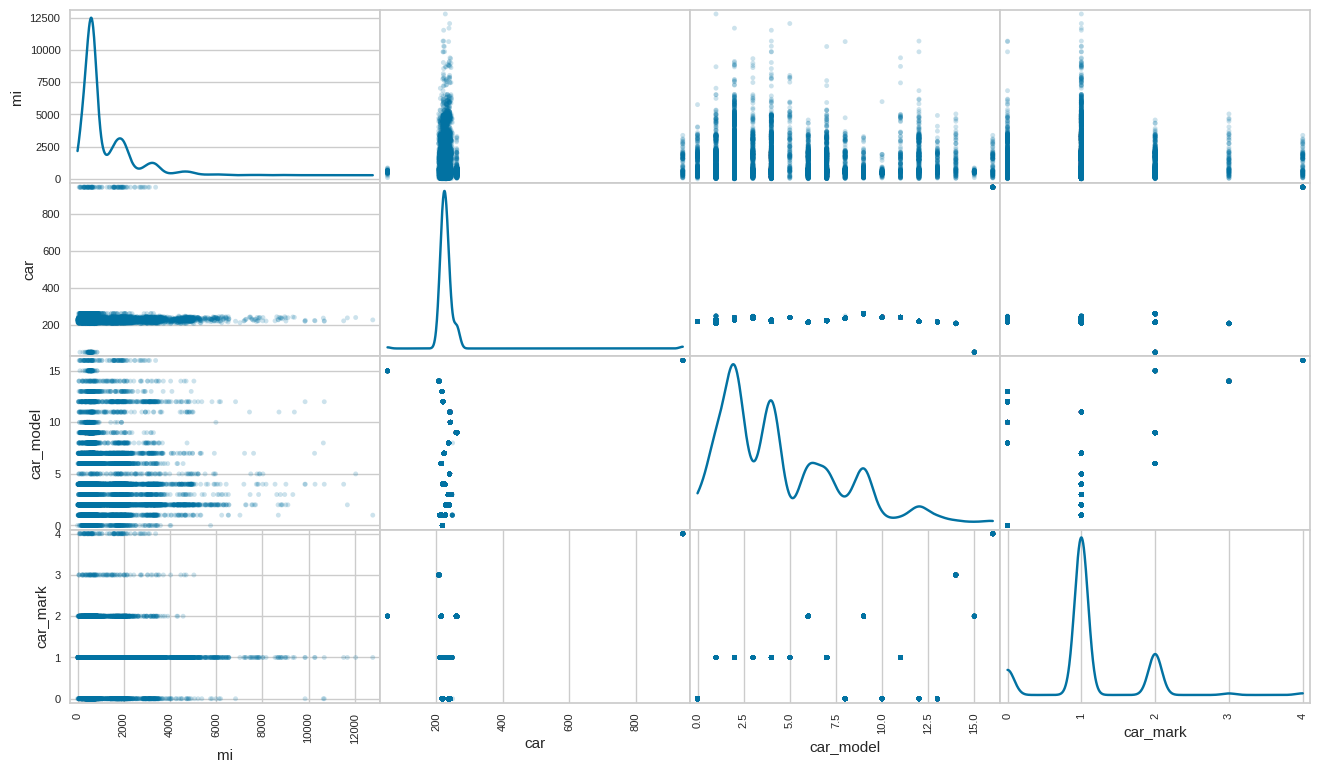

In [ ]:
# Матрица рассеяния. Интересующие варианты с графиком KDE
# Все вариант (будет долго считаться)
#pd.plotting.scatter_matrix(df, diagonal='kde', alpha=0.2, figsize=(16, 9))
pd.plotting.scatter_matrix(df[['mi', 'car', 'car_model', 'car_mark']], diagonal='kde', alpha=0.2, figsize=(16, 9))

### Уменьшим число параметров

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


<Axes: xlabel='km', ylabel='mi'>

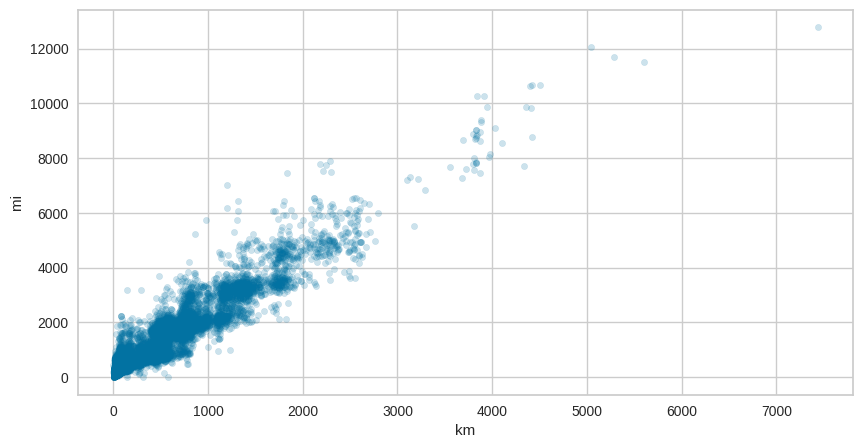

In [ ]:
# Время от расстояния
df.plot.scatter(x='km', y='mi', alpha=0.2, figsize=(10, 5))

In [ ]:
# Удаляем лишние строки
df = df.drop(df[(df.km > 3000) | (df.mi > 7000)].index)

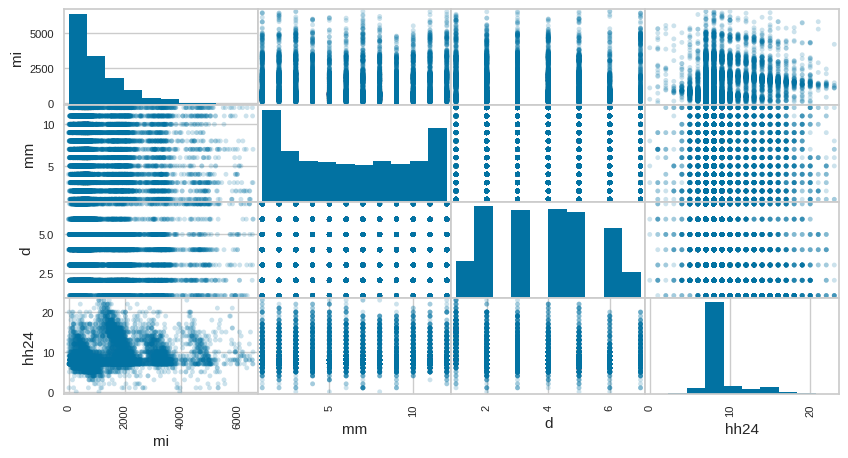

In [ ]:
# Матрица рассеяния. Минуты: Месяц, День недели, Час24,
pd.plotting.scatter_matrix(df[['mi', 'mm', 'd', 'hh24']], alpha=0.2, figsize=(10, 5));

In [ ]:
# Заменим часы на время суток
df['td'] = np.where(df['hh24']<6, 0, np.where(df['hh24']<9, 1, np.where(df['hh24']<18, 0, 0)))
#df['td'] = np.where(df['hh24']<6, 0, np.where(df['hh24']<12, 1, np.where(df['hh24']<18, 2, 3)))

# Посмотрим что в type_cont
df.groupby(['td']).count()

,mm,d,hh24,km,km_empty,cargo_t,cust,car,car_model,car_mark,driver,depo_get_in,depo_get_out,mi,type_oper_unload,type_oper_load,type_oper_empty,type_cont_20,type_cont_40
td,,,,,,,,,,,,,,,,,,,
0,4498,4498,4498,4498,4498,4498,4498,4498,4498,4498,4498,4498,4498,4498,4498,4498,4498,4498,4498
1,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


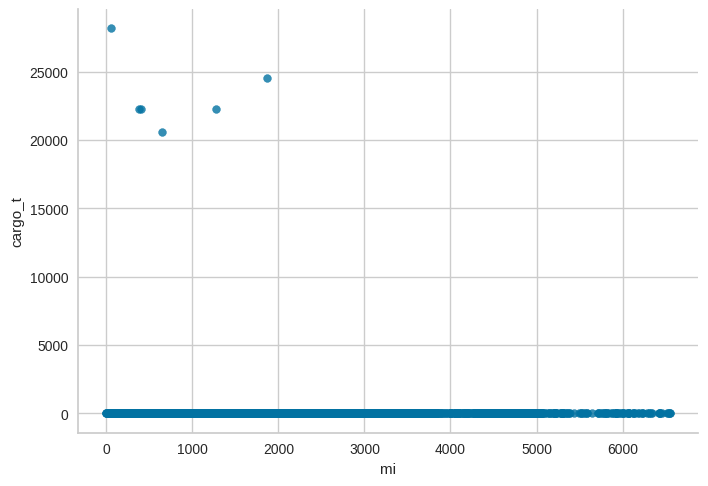

In [ ]:
# Вес груза
df.plot(kind='scatter', x='mi', y='cargo_t', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Заменим вес груза
df['loaded'] = np.where(df['cargo_t']>0, 1, 0)

# Посмотрим что в type_cont
df.groupby(['loaded']).count()

,mm,d,hh24,km,km_empty,cargo_t,cust,car,car_model,car_mark,driver,depo_get_in,depo_get_out,mi,type_oper_unload,type_oper_load,type_oper_empty,type_cont_20,type_cont_40,td
loaded,,,,,,,,,,,,,,,,,,,,
0,11234,11234,11234,11234,11234,11234,11234,11234,11234,11234,11234,11234,11234,11234,11234,11234,11234,11234,11234,11234
1,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872


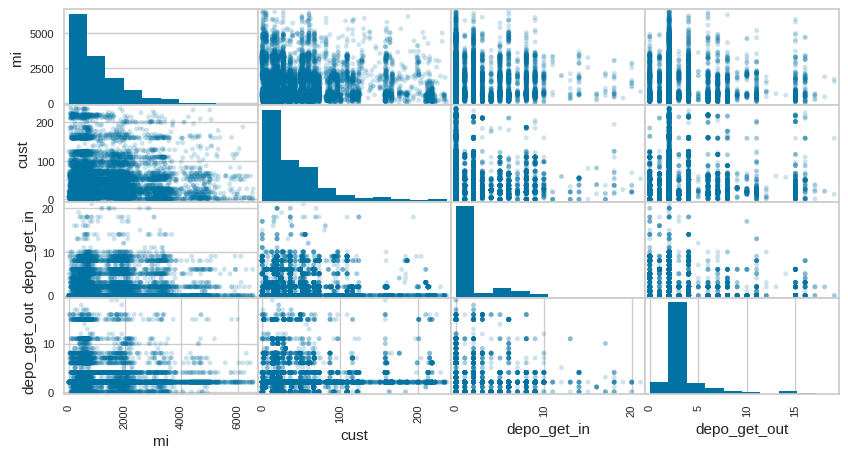

In [ ]:
# Матрица рассеяния. Клиенты депо
pd.plotting.scatter_matrix(df[['mi', 'cust', 'depo_get_in', 'depo_get_out']], alpha=0.2, figsize=(10, 5));

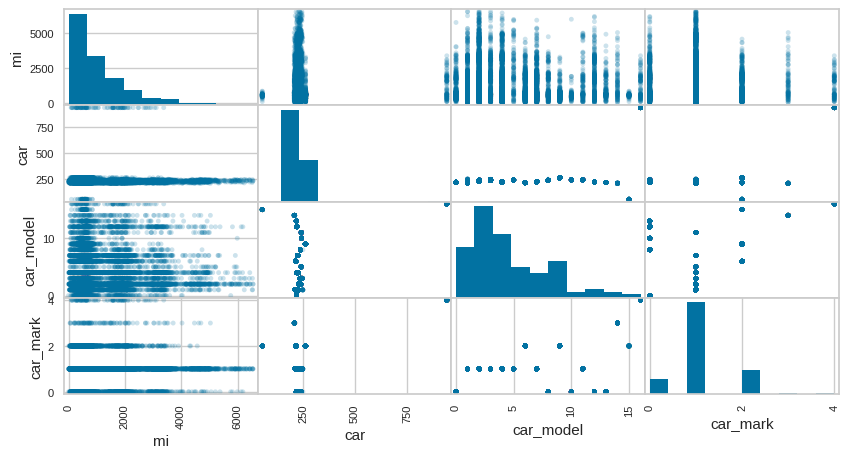

In [ ]:
# Матрица рассеяния. Авто
pd.plotting.scatter_matrix(df[['mi', 'car', 'car_model', 'car_mark']], alpha=0.2, figsize=(10, 5));

array([[<Axes: xlabel='mi', ylabel='mi'>,
        <Axes: xlabel='km', ylabel='mi'>,
        <Axes: xlabel='d', ylabel='mi'>,
        <Axes: xlabel='loaded', ylabel='mi'>],
       [<Axes: xlabel='mi', ylabel='km'>,
        <Axes: xlabel='km', ylabel='km'>,
        <Axes: xlabel='d', ylabel='km'>,
        <Axes: xlabel='loaded', ylabel='km'>],
       [<Axes: xlabel='mi', ylabel='d'>, <Axes: xlabel='km', ylabel='d'>,
        <Axes: xlabel='d', ylabel='d'>,
        <Axes: xlabel='loaded', ylabel='d'>],
       [<Axes: xlabel='mi', ylabel='loaded'>,
        <Axes: xlabel='km', ylabel='loaded'>,
        <Axes: xlabel='d', ylabel='loaded'>,
        <Axes: xlabel='loaded', ylabel='loaded'>]], dtype=object)

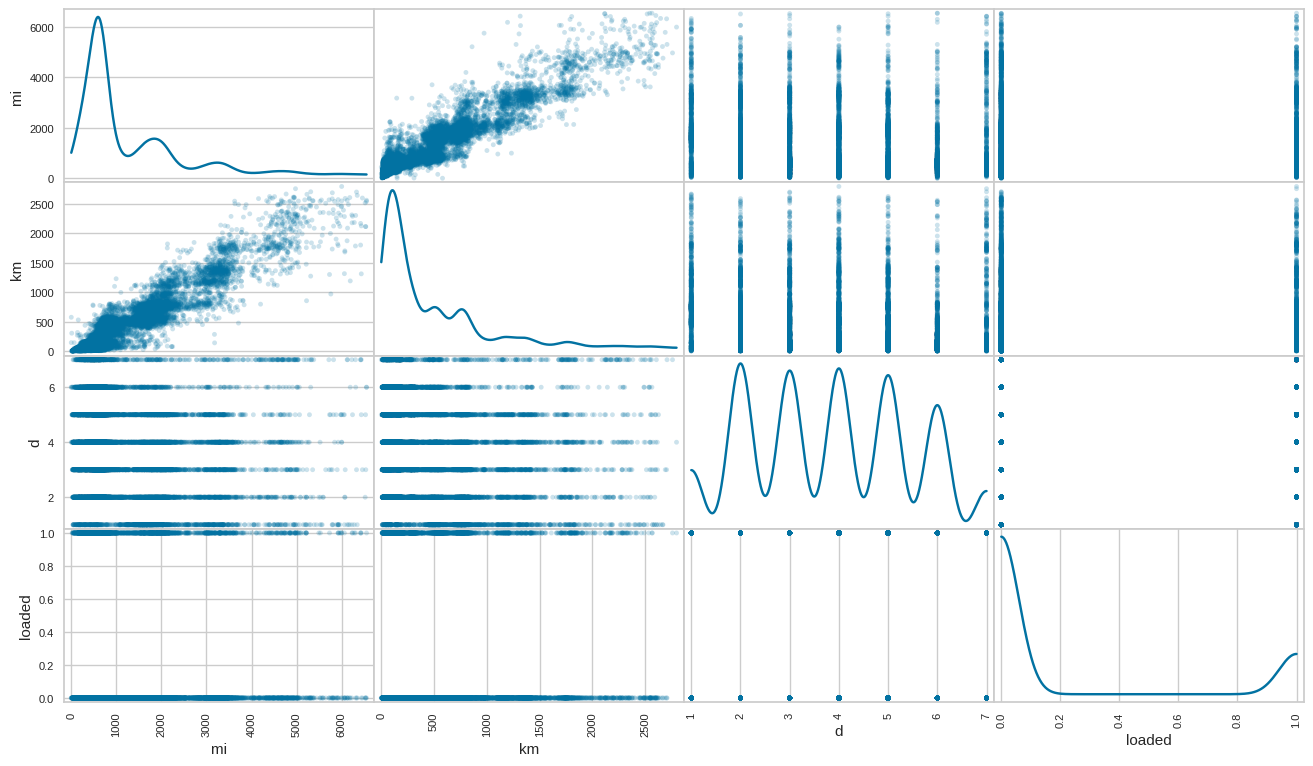

In [ ]:
# Матрица рассеяния. Интересующие варианты с графиком KDE
pd.plotting.scatter_matrix(df[['mi', 'km', 'd', 'loaded']], diagonal='kde', alpha=0.2, figsize=(16, 9))

## Линейнная регрессия

In [ ]:
# Выделим для удобства таргет и фичи (признаки)
#X = df.drop(['mi', 'td'], axis=1) # фичи (признаки)
#X = df.drop(['mi', 'hh24'], axis=1) # фичи (признаки)
X = df.drop(['mi', 'hh24', 'cust', 'driver', 'car', 'car_model',	'car_mark',
             'depo_get_out', 'depo_get_in', 'km_empty',
             'type_cont_20',	'type_cont_40', 'type_oper_empty',
             'type_oper_unload',	'type_oper_load',	'cargo_t', ], axis=1) # фичи (признаки)
y = df.mi # таргет (правильные ответы)

# Сгенерируем выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# где
# X_train - тренировочная выборка
# X_test  - тестовая выборка
# y_train - таргеты тренировочной выборки
# y_test  - таргеты тестовой выборки

In [ ]:
X.head()

,mm,d,km,td,loaded
0,1,1,790,0,0
1,1,1,1318,0,0
2,1,1,509,0,0
3,1,1,547,0,1
4,1,1,588,0,1


In [ ]:
y.head()

0    1970
1    3327
2    1811
3    1382
4    2015
Name: mi, dtype: int64

In [ ]:
# тренировочная выборка
X_train.head()

,mm,d,km,td,loaded
3934,8,5,13,1,0
3812,8,3,30,1,0
3324,7,1,12,1,0
2080,3,5,55,0,0
3445,7,3,55,1,0


In [ ]:
# тестовая выборка
X_test.head()

,mm,d,km,td,loaded
3529,7,4,16,1,0
1461,2,2,306,0,1
3298,6,7,488,0,0
3733,8,2,1275,1,0
3141,6,4,687,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Линейнная регрессия
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

# (1) Линейная регрессия
reg = LinearRegression()
#reg = Ridge(alpha=1.0)

# (2) Обчение
reg.fit(X_train.values, y_train.values)

# (3) Предсказание
y_pred = reg.predict(X_test.values) # 3


# Расчетные коэффициенты для задачи линейной регрессии
print(f"Сoefficients: ", reg.coef_)

# Среднеквадратичная ошибка
print(f"Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))

# (4) Корень среднеквадратичной ошибки
# Чем меньше значение RMSE, тем лучше модель способна делать точные прогнозы
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # 4
print(f"Root Mean Squared Error (RMSE): {rmse}")

# (5) Коэффициент детерминации: 1 - это идеальный прогноз
print(f"Coefficient of determination (r2_score): %.2f" % r2_score(y_test.values, y_pred))

# Коэффициент детерминации прогноза
print(f"Coefficient of determination (score): {reg.score(X.values, y.values)}")

# Прогнозируемое значение зависимой переменной при значении == 0
print(f"intercept_: {reg.intercept_}")

Сoefficients:  [ 5.49016007 -4.31335411  2.098431   -7.7313506   9.5885024 ]
Mean squared error (MSE): 133039.60
Root Mean Squared Error (RMSE): 364.7459351269361
Coefficient of determination (r2_score): 0.88
Coefficient of determination (score): 0.8811412250795131
intercept_: 248.25663405677608


## График предсказаний

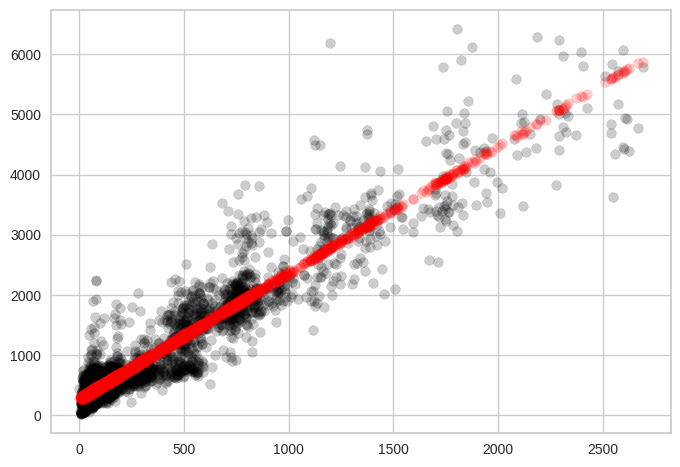

In [ ]:
plt.scatter(X_test['km'], y_test, color="black", alpha=0.2)
plt.scatter(X_test['km'], y_pred, color="red", alpha=0.2)
plt.show()

In [ ]:
# Тепловая карта
X.corr().style.background_gradient(cmap = 'coolwarm')

,mm,d,km,td,loaded
mm,1.000000,-0.008328,-0.025492,0.016621,-0.019232
d,-0.008328,1.000000,-0.165322,0.208134,-0.003159
km,-0.025492,-0.165322,1.000000,-0.283862,-0.004386
td,0.016621,0.208134,-0.283862,1.000000,0.030523
loaded,-0.019232,-0.003159,-0.004386,0.030523,1.000000


<Axes: >

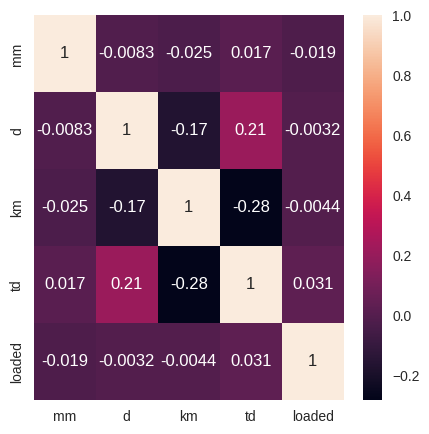

In [ ]:
# Тепловая карта (алтернативный вариант)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(X.corr(), annot=True)

### Предсказание для конкретного случая

In [ ]:
print(y.head())
print(X.head())

# Предсказание
print(reg.predict(np.array([[1, 1, 790, 0, 0]])))
print(reg.predict(np.array([[1, 1, 588, 0, 1]])))

0    1970
1    3327
2    1811
3    1382
4    2015
Name: mi, dtype: int64
   mm  d    km  td  loaded
0   1  1   790   0       0
1   1  1  1318   0       0
2   1  1   509   0       0
3   1  1   547   0       1
4   1  1   588   0       1
[1907.19392999]
[1492.8993704]


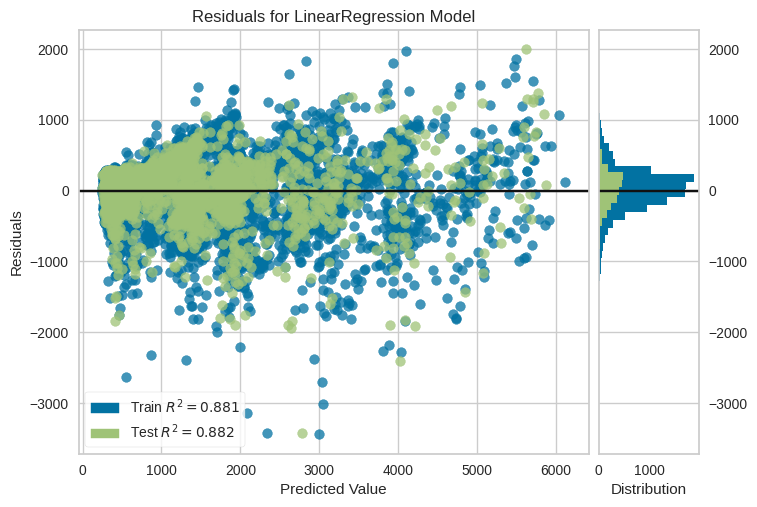

In [ ]:
# График остаточных значений
# показывает разницу между остаточными значениями по вертикальной оси
# и зависимой переменной по горизонтальной оси.
# Позволяет определить области в пределах объекта,
# которые могут быть подвержены большей или меньшей погрешности.
from yellowbrick.regressor import residuals_plot, ResidualsPlot
_ = residuals_plot(estimator=reg,
                   is_fitted=True,
                   X_train=X_train.values,
                   y_train=y_train.values,
                   X_test=X_test.values,
                   y_test=y_test.values)